In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

In [16]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()


In [15]:
import matplotlib.pyplot as plt


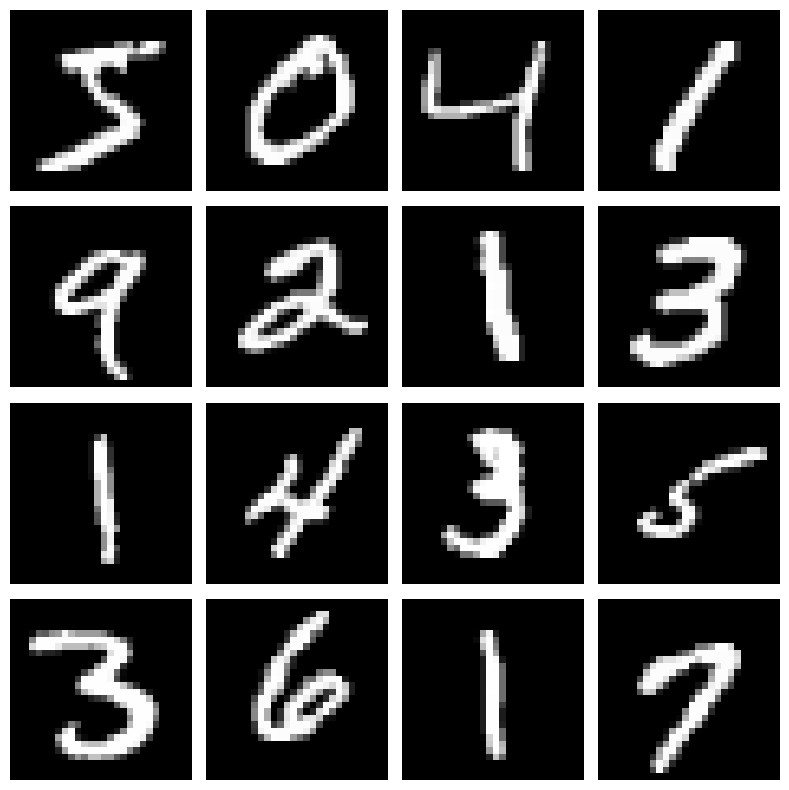

In [18]:
# Displaying the first 16 images from the train dataset
images = x_train[:16]

# Create a subplot grid (4x4)
fig = plt.figure(figsize=(8, 8))

for i in range(16):
    # Create an individual subplot
    ax = fig.add_subplot(4, 4, i+1)
    ax.imshow(images[i], cmap='gray')
    ax.axis('off')  # Hide axis ticks

# Show the plot
plt.tight_layout()
plt.show()

In [19]:

# normalizing the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # Reshape for the model
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [5]:


# Encoder
input_img = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode some images
encoded_imgs = autoencoder.predict(x_test)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - loss: 0.2667 - val_loss: 0.0909
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - loss: 0.0891 - val_loss: 0.0824
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - loss: 0.0822 - val_loss: 0.0789
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - loss: 0.0790 - val_loss: 0.0767
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - loss: 0.0769 - val_loss: 0.0752
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - loss: 0.0756 - val_loss: 0.0741
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - loss: 0.0745 - val_loss: 0.0732
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - loss: 0.0737 - val_loss: 0.0725
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - loss: 0.0730 - val_loss: 0.0720
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - loss: 0.0725 - val_loss: 0.0717
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


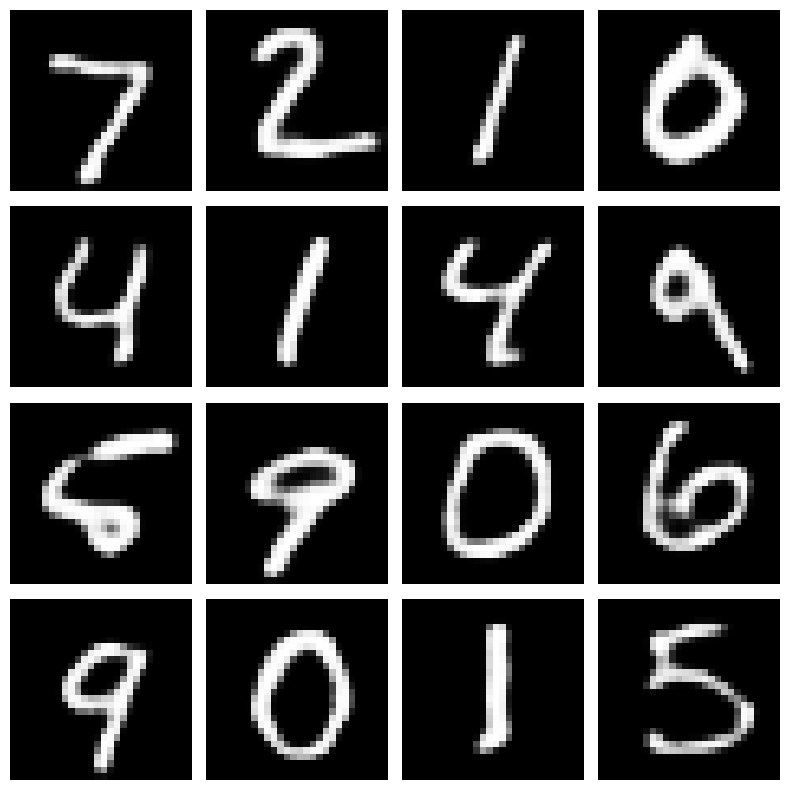

In [24]:

# Displaying the first 4 predicted vs original
predicted = encoded_imgs[:16]
# Create a subplot grid (4x4)
fig = plt.figure(figsize=(8, 8))

for i in range(16):
    # Create an individual subplot
    ax = fig.add_subplot(4, 4, i+1)
    ax.imshow(predicted[i], cmap='gray')
    ax.axis('off')  # Hide axis ticks

# Show the plot
plt.tight_layout()
plt.show()

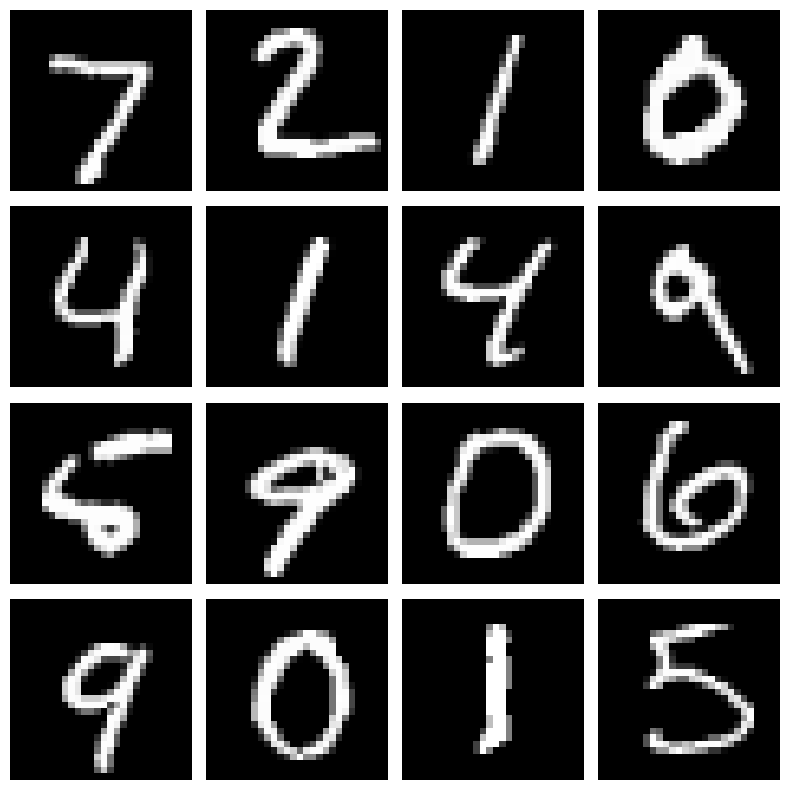

In [25]:
# Displaying the first 4 predicted vs original
original = x_test[:16]
# Create a subplot grid (4x4)
fig = plt.figure(figsize=(8, 8))

for i in range(16):
    # Create an individual subplot
    ax = fig.add_subplot(4, 4, i+1)
    ax.imshow(original[i], cmap='gray')
    ax.axis('off')  # Hide axis ticks

# Show the plot
plt.tight_layout()
plt.show()